In [56]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

import matplotlib.pyplot as plt
%matplotlib inline

In [57]:
df = pd.read_csv('C:/Users/KIIT/Downloads/wheat price.csv')

In [58]:
df

,Date,Open,High,Low,Settle,Volume,Interest
0,01-11-2019,178.25,178.75,177.75,178.00,13975,126929.0
1,31-10-2019,178.75,179.00,177.50,178.00,23741,130834.0
2,30-10-2019,179.50,179.75,178.75,179.00,22706,143451.0
3,29-10-2019,179.75,180.75,179.25,179.50,30358,139853.0
4,28-10-2019,180.25,180.25,179.00,179.25,22103,140170.0
5,25-10-2019,180.00,181.00,178.75,181.00,23303,143160.0
6,24-10-2019,181.00,181.25,179.75,180.00,21200,149710.0
7,23-10-2019,181.25,181.50,180.25,181.00,29012,160266.0
8,22-10-2019,181.50,182.25,181.00,181.00,36640,147458.0
9,21-10-2019,181.25,182.25,180.50,180.75,24107,150404.0


In [59]:
from datetime import datetime
df['Date'] = pd.to_datetime(df['Date'])

In [60]:
df = df.reindex(index=df.index[::-1])

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1554 entries, 1553 to 0
Data columns (total 7 columns):
Date        1554 non-null datetime64[ns]
Open        1554 non-null float64
High        1554 non-null float64
Low         1554 non-null float64
Settle      1554 non-null float64
Volume      1554 non-null int64
Interest    1551 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 85.1 KB


In [62]:
df

,Date,Open,High,Low,Settle,Volume,Interest
1553,2013-08-10,192.75,194.25,192.00,192.50,3249,43599.0
1552,2013-09-10,192.75,194.00,192.00,193.50,2331,43628.0
1551,2013-10-10,194.00,196.50,193.75,194.50,2285,43626.0
1550,2013-11-10,194.00,194.50,193.00,194.25,1171,43677.0
1549,2013-12-10,194.00,194.50,193.00,194.25,1171,43677.0
1548,2013-10-14,194.50,194.75,194.00,194.50,635,43822.0
1547,2013-10-15,194.50,195.00,194.00,194.75,2287,43553.0
1546,2013-10-16,194.25,194.50,193.75,194.00,2127,43269.0
1545,2013-10-17,194.50,195.00,193.50,194.00,2002,43789.0
1544,2013-10-18,194.00,197.25,194.00,196.75,4867,44306.0


In [63]:
df.set_index('Date',inplace=True)

In [64]:
df.head()

,Open,High,Low,Settle,Volume,Interest
Date,,,,,,
2013-08-10,192.75,194.25,192.00,192.50,3249,43599.0
2013-09-10,192.75,194.00,192.00,193.50,2331,43628.0
2013-10-10,194.00,196.50,193.75,194.50,2285,43626.0
2013-11-10,194.00,194.50,193.00,194.25,1171,43677.0
2013-12-10,194.00,194.50,193.00,194.25,1171,43677.0


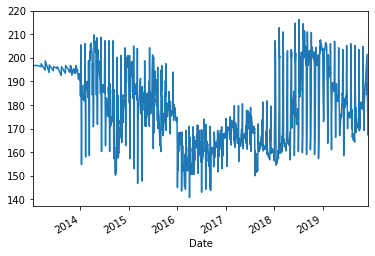

In [65]:
df['Settle'].plot()

In [66]:
timeseries = df['Settle']

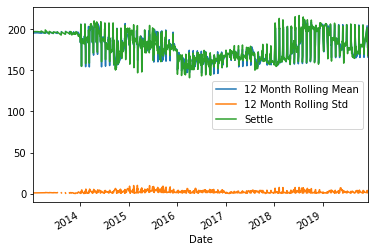

In [67]:
timeseries.rolling(12).mean().plot(label='12 Month Rolling Mean')
timeseries.rolling(12).std().plot(label='12 Month Rolling Std')
timeseries.plot()
plt.legend()

In [68]:
timeseries.rolling(12).mean()

Date
2013-08-10           NaN
2013-09-10           NaN
2013-10-10           NaN
2013-11-10           NaN
2013-12-10           NaN
                 ...    
2019-10-28    180.333333
2019-10-29    180.291667
2019-10-30    180.187500
2019-10-31    180.166667
2019-01-11    180.000000
Name: Settle, Length: 1554, dtype: float64

<Figure size 432x288 with 0 Axes>

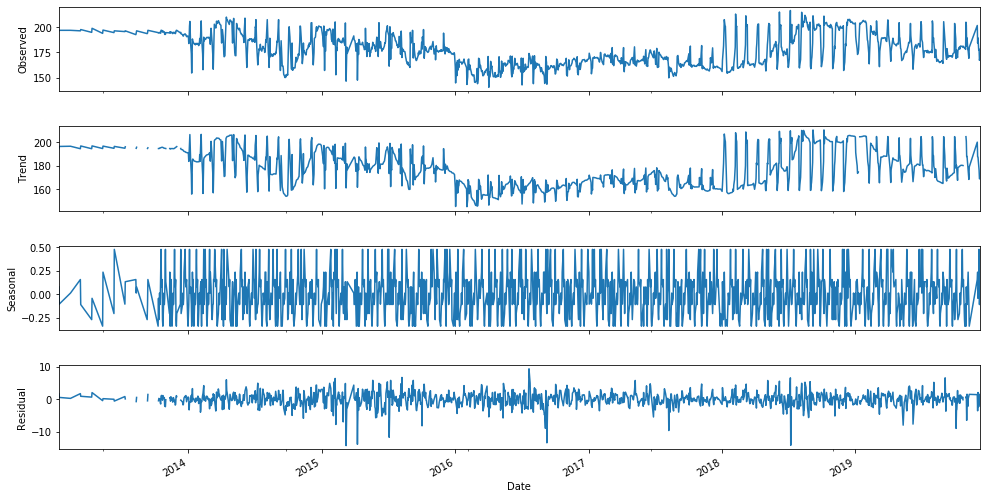

In [69]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['Settle'], freq=12)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

In [70]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['Settle'])
print('Augmented Dickey-Fuller Test:')
labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

for value,label in zip(result,labels):
    print(label+' : '+str(value) )
    
if result[1] <= 0.05:
    print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
else:
    print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

Augmented Dickey-Fuller Test:
ADF Test Statistic : -2.7376958267617892
p-value : 0.06773928883039503
#Lags Used : 1
Number of Observations Used : 1552
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [71]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

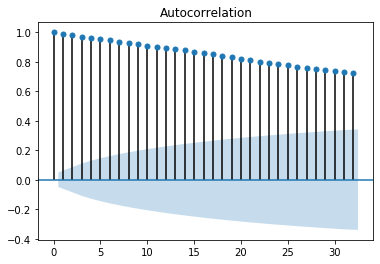

In [72]:
fig_first = plot_acf(df["Settle"].dropna())

In [73]:
df['Settle 1'] = df['Settle'] - df['Settle'].shift(1)

In [74]:
result = adfuller(df['Settle 1'].dropna())
print('Augmented Dickey-Fuller Test:')
labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

for value,label in zip(result,labels):
    print(label+' : '+str(value) )
    
if result[1] <= 0.05:
    print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
else:
    print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

Augmented Dickey-Fuller Test:
ADF Test Statistic : -43.34926048562874
p-value : 0.0
#Lags Used : 0
Number of Observations Used : 1552
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


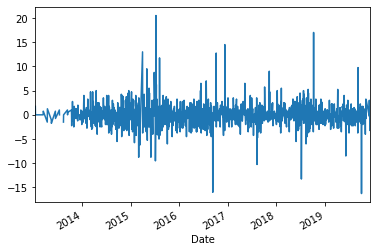

In [75]:
df['Settle 1'].plot()

In [76]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

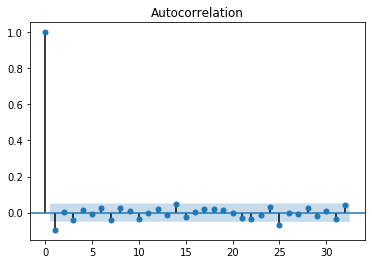

In [77]:
fig_first = plot_acf(df["Settle 1"].dropna())

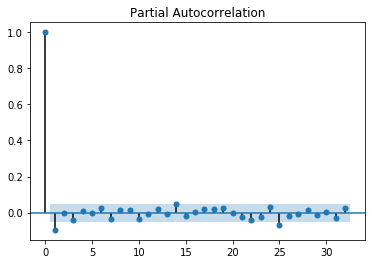

In [78]:
fig_first = plot_pacf(df["Settle 1"].dropna())

In [79]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df['Settle'], order=(1,1,1))
result = model.fit(disp = 0)
print(result.summary())

c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:               D.Settle   No. Observations:                 1553
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3463.193
Method:                       css-mle   S.D. of innovations              2.250
Date:                Mon, 06 Jan 2020   AIC                           6934.386
Time:                        21:34:07   BIC                           6955.778
Sample:                             1   HQIC                          6942.342
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0094      0.051     -0.183      0.855      -0.110       0.091
ar.L1.D.Settle     0.0315      0.458      0.069      0.945      -0.866       0.929
ma.L1.D.Settle    -0.1280      0.456

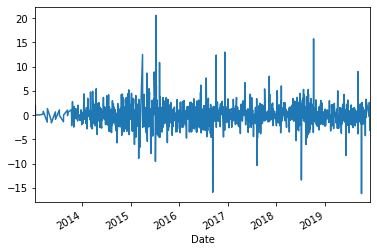

In [80]:
result.resid.plot()

In [81]:
result.resid

Date
2013-09-10    1.009402
2013-10-10    1.105610
2013-11-10   -0.130909
2013-12-10    0.000221
2013-10-14    0.259134
                ...   
2019-10-28   -1.655373
2019-10-29    0.102350
2019-10-30   -0.485663
2019-10-31   -1.037307
2019-01-11   -0.092161
Length: 1553, dtype: float64

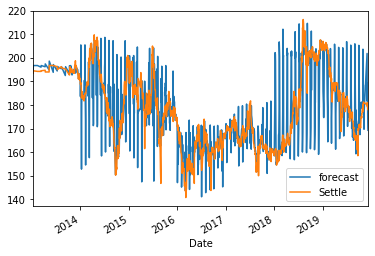

In [82]:
result.plot_predict(dynamic=False)
plt.show()

c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


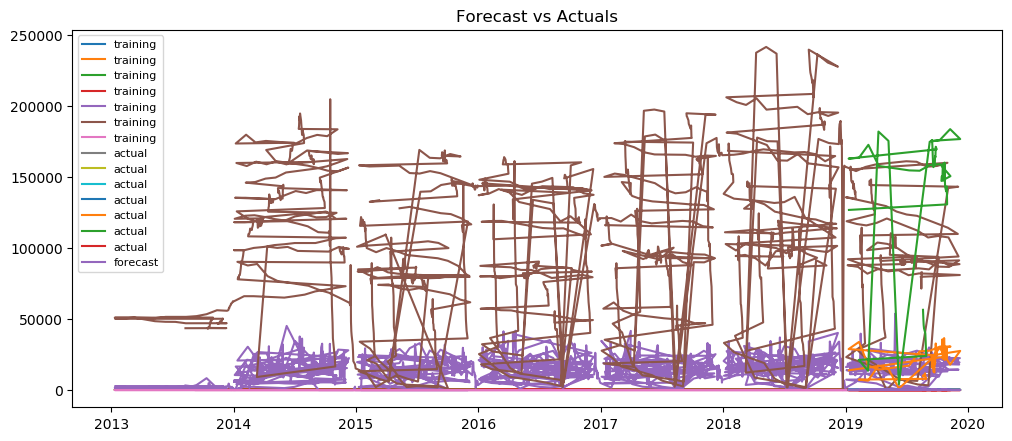

In [83]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = df.iloc[:1500]
test = df.iloc[1500:]

# Build Model 
model = ARIMA(train['Settle'], order=(1,1,1))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(54, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [84]:
fitted.summary()# 1 1 1

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D.Settle   No. Observations:                 1499
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3344.850
Method:                       css-mle   S.D. of innovations              2.253
Date:                Mon, 06 Jan 2020   AIC                           6697.701
Time:                        21:34:08   BIC                           6718.951
Sample:                             1   HQIC                          6705.617
                                                                              
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0178      0.056     -0.318      0.750      -0.127       0.092
ar.L1.D.Settle    -0.6992      0.246     -2.841      0.005      -1.182      -0.217
ma.L1.D.Settle     0.6328      0.268      2.364      0.018       0.108       1.158
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.4303           +0.0000j            1.4303            0.5000
MA.1           -1.5802           +0.0000j            1.5802            0.5000
-----------------------------------------------------------------------------
"""

In [85]:
rmse = np.mean((fc - test['Settle'])**2)**.5 

In [86]:
rmse

9.896890456513322

In [87]:
mpe = np.mean((fc - test['Settle'])/test['Settle'])
mpe

-0.042647456448264134

In [88]:
df.tail()

,Open,High,Low,Settle,Volume,Interest,Settle 1
Date,,,,,,,
2019-10-28,180.25,180.25,179.00,179.25,22103,140170.0,-1.75
2019-10-29,179.75,180.75,179.25,179.50,30358,139853.0,0.25
2019-10-30,179.50,179.75,178.75,179.00,22706,143451.0,-0.50
2019-10-31,178.75,179.00,177.50,178.00,23741,130834.0,-1.00
2019-01-11,178.25,178.75,177.75,178.00,13975,126929.0,0.00


In [89]:
from pandas.tseries.offsets import DateOffset

In [90]:
future_dates = [df.index[-1] + DateOffset(days=x) for x in range(0,1080) ]

In [91]:
future_dates

[Timestamp('2019-01-11 00:00:00'),
 Timestamp('2019-01-12 00:00:00'),
 Timestamp('2019-01-13 00:00:00'),
 Timestamp('2019-01-14 00:00:00'),
 Timestamp('2019-01-15 00:00:00'),
 Timestamp('2019-01-16 00:00:00'),
 Timestamp('2019-01-17 00:00:00'),
 Timestamp('2019-01-18 00:00:00'),
 Timestamp('2019-01-19 00:00:00'),
 Timestamp('2019-01-20 00:00:00'),
 Timestamp('2019-01-21 00:00:00'),
 Timestamp('2019-01-22 00:00:00'),
 Timestamp('2019-01-23 00:00:00'),
 Timestamp('2019-01-24 00:00:00'),
 Timestamp('2019-01-25 00:00:00'),
 Timestamp('2019-01-26 00:00:00'),
 Timestamp('2019-01-27 00:00:00'),
 Timestamp('2019-01-28 00:00:00'),
 Timestamp('2019-01-29 00:00:00'),
 Timestamp('2019-01-30 00:00:00'),
 Timestamp('2019-01-31 00:00:00'),
 Timestamp('2019-02-01 00:00:00'),
 Timestamp('2019-02-02 00:00:00'),
 Timestamp('2019-02-03 00:00:00'),
 Timestamp('2019-02-04 00:00:00'),
 Timestamp('2019-02-05 00:00:00'),
 Timestamp('2019-02-06 00:00:00'),
 Timestamp('2019-02-07 00:00:00'),
 Timestamp('2019-02-

In [92]:
future_dates_df = pd.DataFrame(index=future_dates[1:],columns=df.columns)
future_df = pd.concat([df,future_dates_df])
df = future_df
df

,Open,High,Low,Settle,Volume,Interest,Settle 1
2013-08-10,192.75,194.25,192.00,192.50,3249,43599.0,NaN
2013-09-10,192.75,194.00,192.00,193.50,2331,43628.0,1.00
2013-10-10,194.00,196.50,193.75,194.50,2285,43626.0,1.00
2013-11-10,194.00,194.50,193.00,194.25,1171,43677.0,-0.25
2013-12-10,194.00,194.50,193.00,194.25,1171,43677.0,0.00
2013-10-14,194.50,194.75,194.00,194.50,635,43822.0,0.25
2013-10-15,194.50,195.00,194.00,194.75,2287,43553.0,0.25
2013-10-16,194.25,194.50,193.75,194.00,2127,43269.0,-0.75
2013-10-17,194.50,195.00,193.50,194.00,2002,43789.0,0.00
2013-10-18,194.00,197.25,194.00,196.75,4867,44306.0,2.75


c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


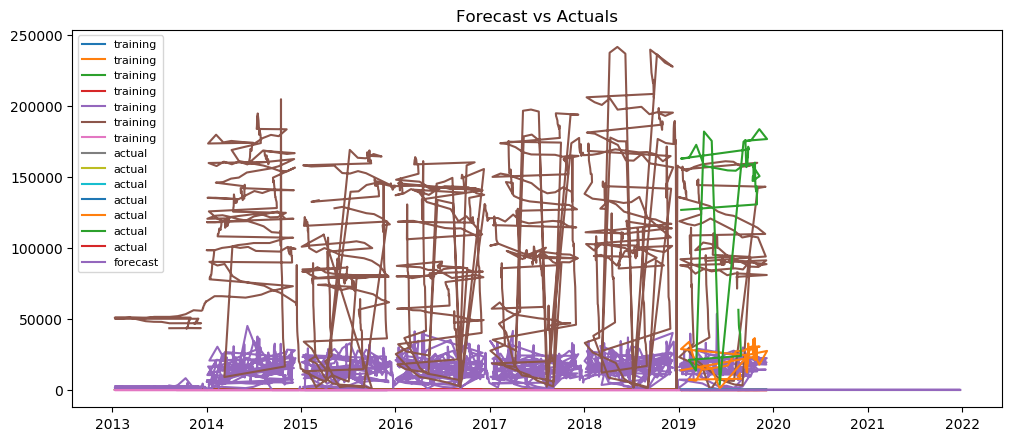

In [93]:
# Create Training and Test
train = df.iloc[:1500]
test = df.iloc[1500:]

# Build Model 
model = ARIMA(train['Settle'], order=(1,1,1))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(1133, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [96]:
fc_series #wheat forecast

2019-08-20    165.842120
2019-08-21    165.747451
2019-08-22    165.783378
2019-08-23    165.727997
2019-08-26    165.736455
                 ...    
2021-12-21    145.707188
2021-12-22    145.689378
2021-12-23    145.671568
2021-12-24    145.653758
2021-12-25    145.635948
Length: 1133, dtype: float64

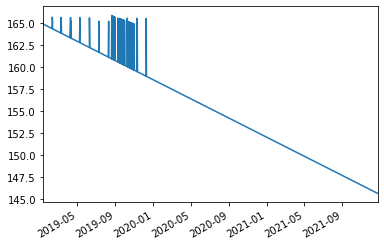

In [97]:
fc_series.plot()  #wheat forecast